In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def correlation_2d(I, kernel):
    h = kernel.shape[0]
    w = kernel.shape[1]

    O = tf.Variable(tf.zeros((I.shape[0] - h + 1, I.shape[1] - w + 1)))

    for i in range(O.shape[0]):
        for j in range(O.shape[1]):
            O[i, j].assign(tf.reduce_sum(I[i: i + h, j: j+ w] * kernel))
    return O

In [3]:
train_directory = 'tiny-imagenet-200/tiny-imagenet-200/train/n01629819/images/n01629819_12.JPEG'
image = tf.keras.preprocessing.image.load_img(train_directory, color_mode = 'rgb')
X = tf.keras.preprocessing.image.img_to_array(image)

print(X[..., 0].shape)

kernel = tf.constant([[1, 0, 1],
                [1, 0, -1],
                [1, 0, -1]], dtype = float)
correlation_2d(X[..., 0], kernel)

(64, 64)


<tf.Variable 'Variable:0' shape=(62, 62) dtype=float32, numpy=
array([[105., 199., 273., ..., 285., 402., 266.],
       [143., 178., 219., ..., 135., 413., 333.],
       [235., 121., 274., ..., 259., 298., 391.],
       ...,
       [183., 275., 432., ..., 415., 398., 365.],
       [326., 297., 386., ..., 410., 369., 375.],
       [316., 284., 348., ..., 348., 340., 294.]], dtype=float32)>

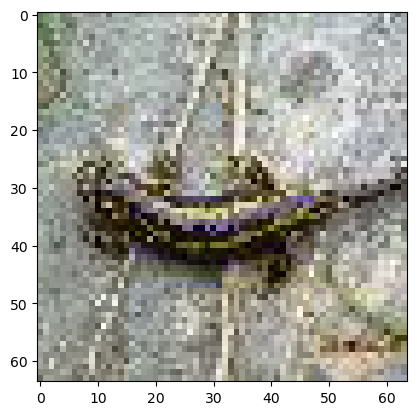

In [5]:
imgplot = plt.imshow(image)
plt.show()

tf.Tensor(
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]], shape=(3, 3), dtype=float32)


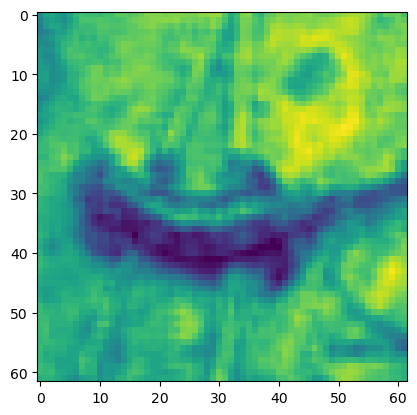

In [6]:
kernel = 1/9 * tf.ones([3, 3])
print(kernel)
imgplot = plt.imshow(correlation_2d(X, kernel).numpy())
plt.show()

tf.Tensor(
[[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]], shape=(3, 3), dtype=float32)


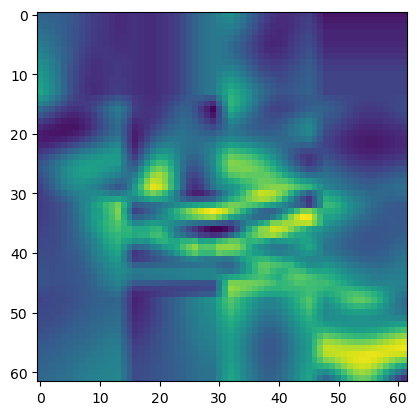

In [7]:
kernel = tf.constant([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]], dtype = float)
print(kernel)
imgplot = plt.imshow(correlation_2d(X, kernel).numpy())
plt.show()

tf.Tensor(
[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]], shape=(3, 3), dtype=float32)


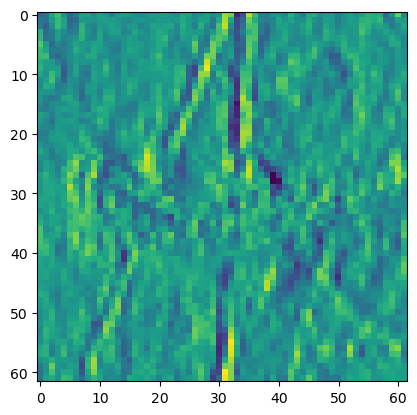

In [8]:
kernel = tf.constant([[1, 1, 1],
                     [0, 0, 0],
                     [-1, -1, -1]], dtype = float)
print(kernel)
imgplot = plt.imshow(correlation_2d(X, kernel).numpy())
plt.show()